# Using ANOVA and ANCOVA on the NYCflights Dataset

In [2]:
#use this for amchine learning
#install.packages('tidyverse')
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
#install.packages('nycflights13')
library(nycflights13)
?flights

In [4]:
View(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


We can see from the tibble that we have the following 19 columns.
- Year, month, day of the flights
- dep_time - time the flight departed
- sched_dep_time - time the flight was scheduled to depart
- dep_delay - by how much was the flight delayed 
- arr_time - time that it arrived at it's destination
- scehd_arr_time - time the flight was scheduled to arrive
- arr_delay - difference between sceduled and actualm ariival time
- carrier - carrier code for the flight
- flight - flight number
- tailnum - tail number 
- origin - airport the flight departed 
- dest - airport the flight arrived at
- air_time - time of the flight in minutes
- distance - distance the flight flew in miles
- hour - hour the flight was scheduled to depart
- minute - minute the flight was set to depart
- time_hour - date and time in the same column

Firstly, let's do some basic data cleaning

In [5]:
# deleitng rows with null values 

flights_ready <- na.omit(flights)
View(flights_ready)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [6]:
# Exploring the data that we're interested in
summary(flights_ready$dep_delay)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.00   -5.00   -2.00   12.56   11.00 1301.00 

As we can see the earliest a flight departed was 43 minutes and the latest 1301 minutes. The median is minus -2 minutes (most common value was for a flight to leave 2 minutes earlier than scheduled) and the mean was 12.56 minutes. We can visulaise this below:

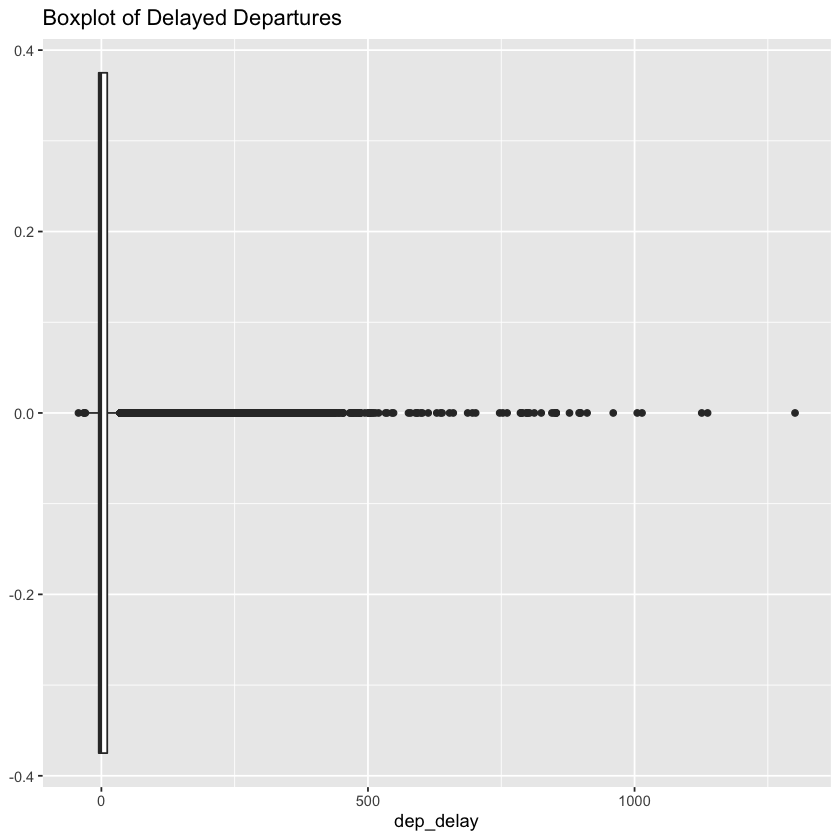

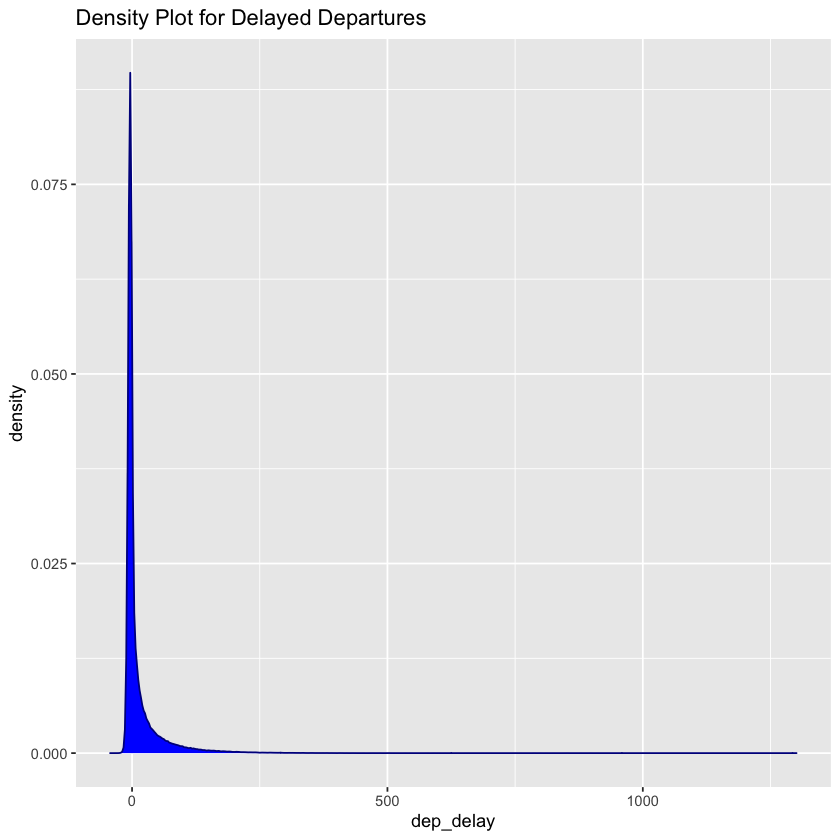

In [7]:
delay_boxplot <- ggplot(data = flights_ready, aes(dep_delay))+
    geom_boxplot()+
    labs(title = 'Boxplot of Delayed Departures')
delay_density <- ggplot(data = flights_ready, aes(dep_delay))+
    geom_density(colour = 'Darkblue', fill = "blue")+
    labs(title = 'Density Plot for Delayed Departures')
delay_boxplot
delay_density


As we can see from the boxplot there are a lot of outliers with most of the flights hovering around 0 which is to be expected. If we have a look at a lineplot we can see what kind of retaionship it has throughout the year

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



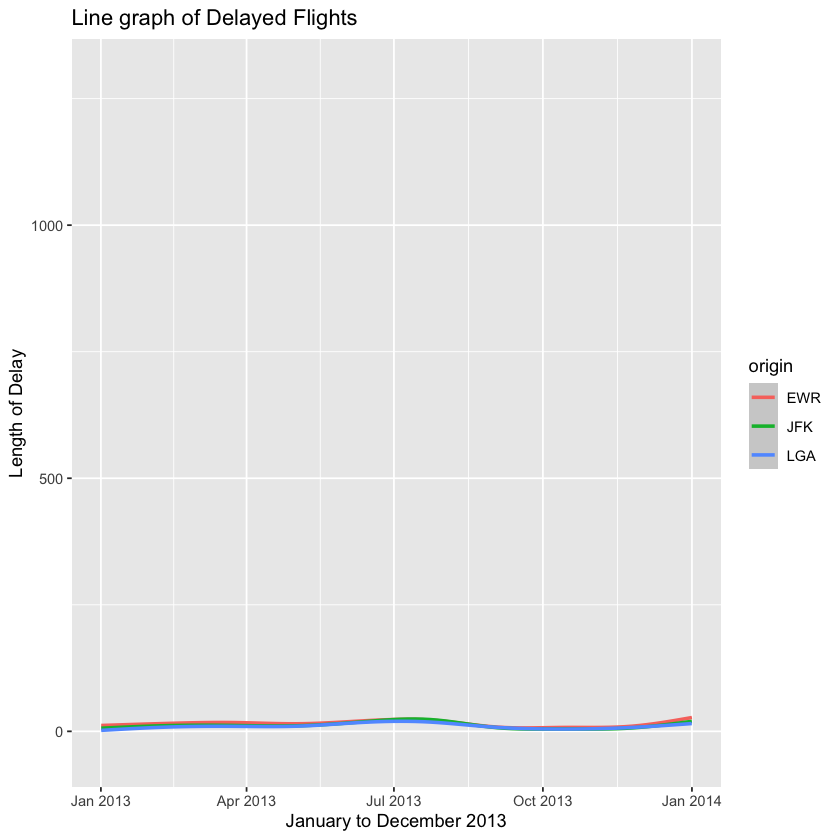

In [9]:
delay_line <- ggplot(data = flights_ready,aes(time_hour, dep_delay, colour = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Line graph of Delayed Flights', x = 'January to December 2013', y = 'Length of Delay')
delay_line

In [108]:
View(weather)

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00
EWR,2013,1,1,7,39.02,28.04,64.43,240,14.96014,NA,0,1012.2,10,2013-01-01 07:00:00
EWR,2013,1,1,8,39.92,28.04,62.21,250,10.35702,NA,0,1012.2,10,2013-01-01 08:00:00
EWR,2013,1,1,9,39.92,28.04,62.21,260,14.96014,NA,0,1012.7,10,2013-01-01 09:00:00


In [112]:
summary(weather$temp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.94   39.92   55.40   55.26   69.98  100.04       1 

In [113]:
summary(weather$humid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.74   47.05   61.79   62.53   78.79  100.00       1 

In [114]:
summary(weather$precip)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.004469 0.000000 1.210000 

In [115]:
summary(weather$wind_speed)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   0.000    6.905   10.357   10.518   13.809 1048.361        4 

In [116]:
summary(weather$pressure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  983.8  1012.9  1017.6  1017.9  1023.0  1042.1    2729 

In [117]:
summary(weather$visib)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000  10.000  10.000   9.255  10.000  10.000 

In [10]:
# Lets have a look at temperature throughout the year%>%
temp_plot<-ggplot(data=weather, aes(time_hour,temp, colour = origin))+
    geom_point(alpha = 0)+
    geom_smooth(se = T)+
    labs(title = "Temperature over the year for JFK, EWR and LGA", x = 'January to December 2013')

In [11]:
humidity_plot <- ggplot(data = weather,aes(time_hour, humid, colour = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Humidity over the Year', x = 'January to December 2013', y = 'Humidity')
precipitation_plot <- ggplot(data = weather, aes(time_hour, precip, colour = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Preciptation over the year', x = 'January to December 2013', y = 'Precipitation')
wind_plot <- ggplot(data = weather, aes(time_hour, wind_speed, colour = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Wind Speed over the year', x = 'January to December 2013', y = 'Wind Speed')  
visibility_plot <- ggplot(data = weather, aes(time_hour,visib, colour  = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Visibility over the year', x = 'January to December 2013', y = 'Visibility')
pressure_plot <- ggplot(data = weather, aes(time_hour,pressure, colour  = origin))+
    geom_point(alpha = 0)+
    geom_smooth()+
    labs(title = 'Pressure over the year', x = 'January to December 2013', y = 'Pressure')

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 2729 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2729 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 

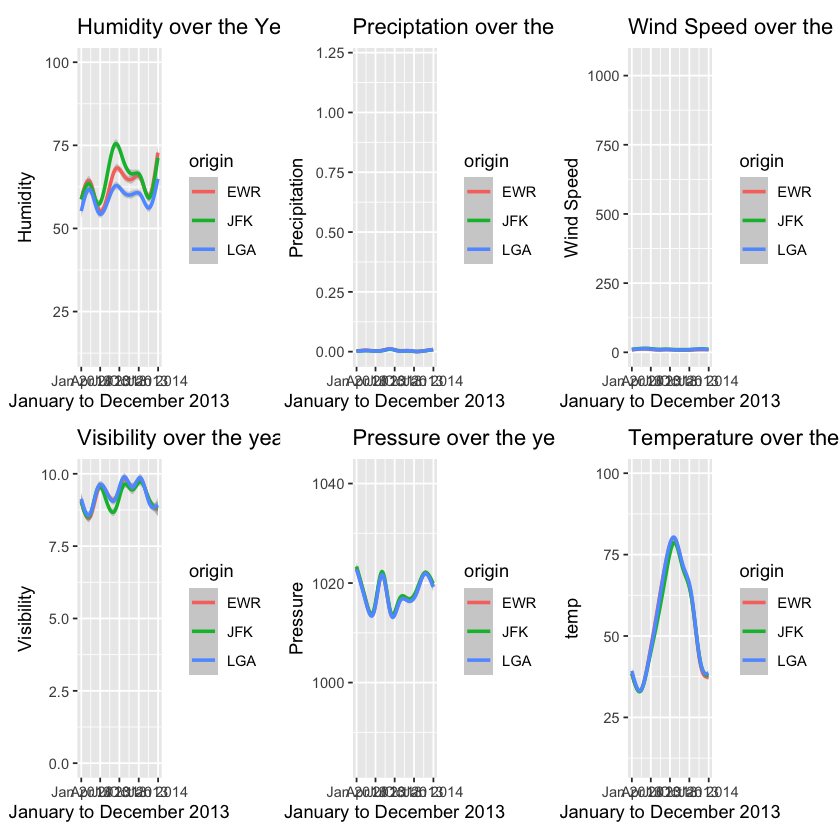

In [12]:
#install.packages('patchwork')
library(patchwork)
humidity_plot + precipitation_plot + wind_plot + visibility_plot + pressure_plot+temp_plot

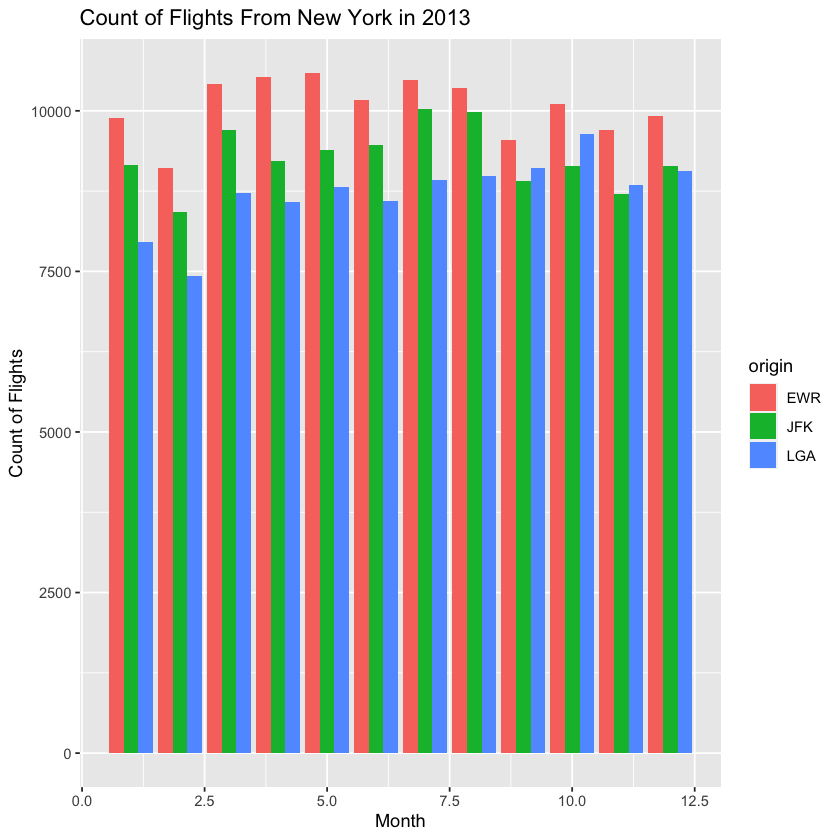

In [13]:
# how many flights take off per month
flights %>%
    ggplot(aes(fill = origin, month))+
    geom_bar(position = 'dodge')+
    labs(title = 'Count of Flights From New York in 2013', x = 'Month', y = 'Count of Flights')

In [324]:
#Let's join the tables we need together
joined_flights <- left_join(flights_ready, weather)
joined_flights2 <- left_join(joined_flights, planes)

Joining, by = c("year", "month", "day", "origin", "hour", "time_hour")
Joining, by = c("year", "tailnum")


In [325]:
View(joined_flights2)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,precip,pressure,visib,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,0,1011.9,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,533,529,4,850,830,20,UA,⋯,0,1011.4,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,542,540,2,923,850,33,AA,⋯,0,1012.1,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,0,1012.1,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,554,600,-6,812,837,-25,DL,⋯,0,1011.7,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,554,558,-4,740,728,12,UA,⋯,0,1011.9,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,555,600,-5,913,854,19,B6,⋯,0,1012.4,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,557,600,-3,709,723,-14,EV,⋯,0,1011.7,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,557,600,-3,838,846,-8,B6,⋯,0,1012.6,10,NA,NA,NA,NA,NA,NA,NA


In [326]:
# now lets create our delayed flights table
delayed_flights <- joined_flights2 %>%
    filter(dep_delay>0)
delayed_flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,precip,pressure,visib,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,517,515,2,830,819,11,UA,⋯,0,1011.9,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,533,529,4,850,830,20,UA,⋯,0,1011.4,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,542,540,2,923,850,33,AA,⋯,0,1012.1,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,601,600,1,844,850,-6,B6,⋯,0,1012.4,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,608,600,8,807,735,32,MQ,⋯,0,1012.4,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,611,600,11,945,931,14,UA,⋯,0,1012.6,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,613,610,3,925,921,4,B6,⋯,0,1012.6,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,623,610,13,920,915,5,AA,⋯,0,1011.7,10,NA,NA,NA,NA,NA,NA,NA
2013,1,1,632,608,24,740,728,12,EV,⋯,0,1012.4,10,NA,NA,NA,NA,NA,NA,NA


In [327]:
# creating the season's column
delayed_flights$season <- as.factor(ifelse(delayed_flights$month <3, "Winter",
                                    ifelse(delayed_flights$month <6, 'Spring',
                                    ifelse(delayed_flights$month <9, 'Summer',
                                    ifelse(delayed_flights$month <12, 'Autumn',
                                    ifelse(delayed_flights$month <13, 'Winter'))))))

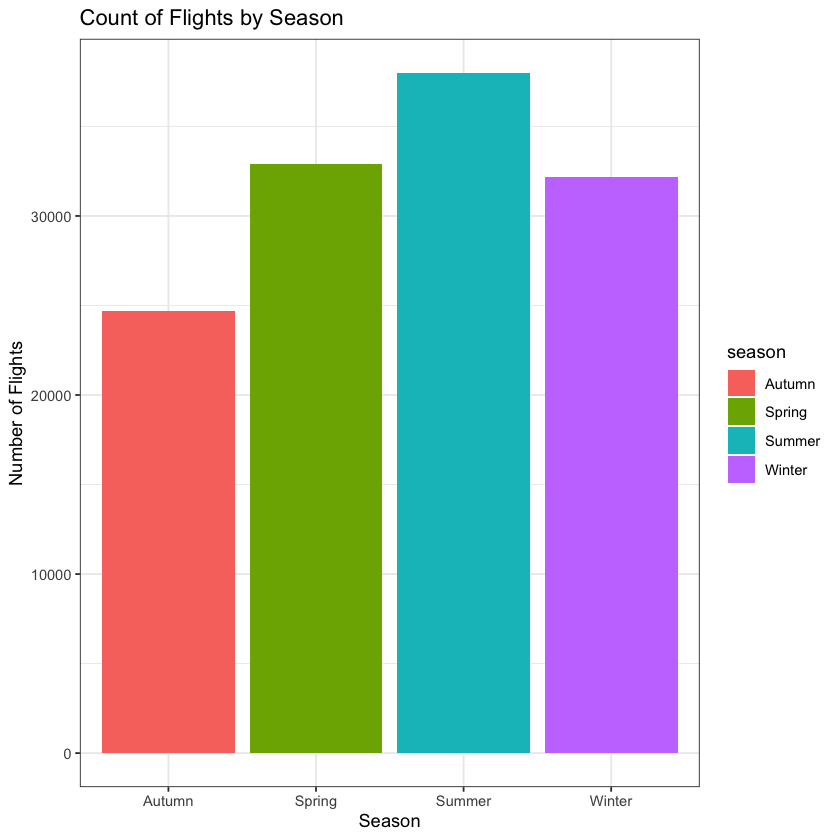

In [285]:
delayed_flights%>%
    ggplot(aes(season, fill = season))+
    geom_bar()+
    labs(title = 'Count of Flights by Season', x = 'Season', y = 'Number of Flights')+ 
    theme_bw()

Now we have our variables in play. It should be noted that for delayed departures we are not including flights that departed early (negative values) as we are only interested in the delayed flights. Let's plot them and have a look at the boxplots

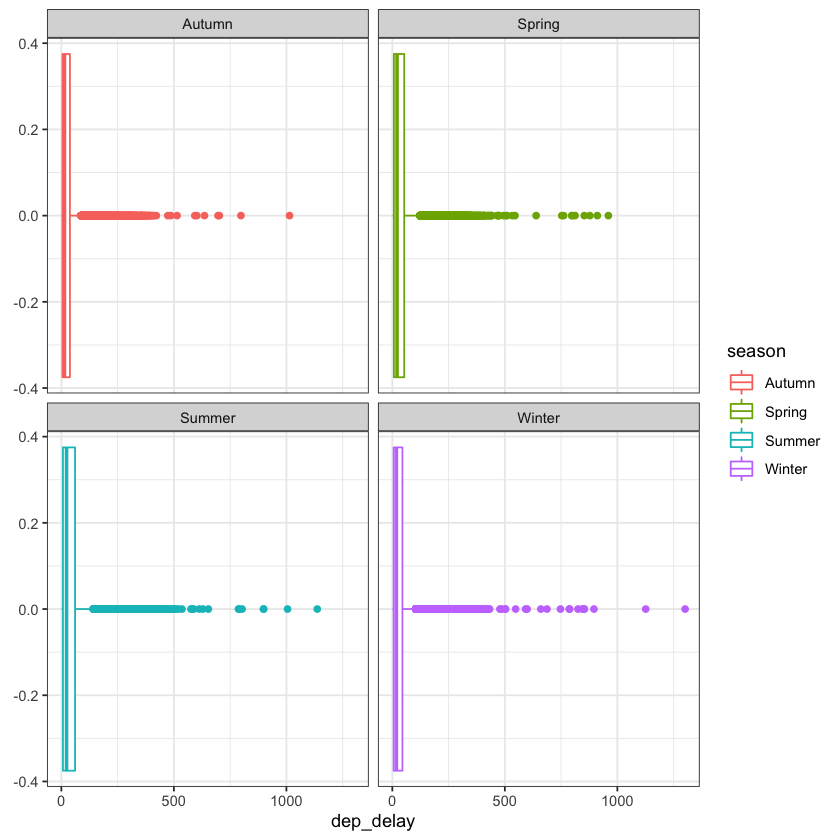

In [291]:
delayed_flights %>%
    ggplot(aes(dep_delay, colour = season))+
    geom_boxplot()+
    facet_wrap(~season)+
    theme_bw()


As we can see above, they all had a number of outliers which is to be expected as flight delays of differing lengths will be expected depending on the complexity of the problem. Beacuse of the size of boxplots and the outliers it is difficult to see if there are any differences as a group. Instead let's have a look at the means below


In [347]:
#selecting our data
flight_data <- delayed_flights %>%
    select(season, dep_delay)
flight_data

season,dep_delay
<fct>,<dbl>
Winter,2
Winter,4
Winter,2
Winter,1
Winter,8
Winter,11
Winter,3
Winter,13
Winter,24


In [297]:
flight_data %>%
    group_by(season)%>%
    summarise(Mean_Delay = mean(dep_delay))%>%
    arrange(Mean_Delay)


season,Mean_Delay
<fct>,<dbl>
Autumn,31.83813
Winter,35.98512
Spring,40.81905
Summer,45.43005


As we can see from the table above, there are differences in the mean for all four seasons. Summer seems to have the largest average delay at just over 45 minutes, with Autumn the lowest at just under 32 minutes. 

For this project we want to know if the observed difference is statistically significant. In other words, is the difference by chance or is it genuine. To do this we will run an ANOVA.

ANOVA is a staistical test used to compare the means of several categorical variables. In our project this is each season. As a result only tells us whether there is an overall effect of the independent variable on the dependent variable (we'll look at how to get around this later on). Before we carry out ANOVA we must first use Levene's test to determine whether the data meets the homogeneity of variance assumption. 

Homogeneity of Variance is when we have an equal amount of variance for each level of the independent variable. The means may differ but the socres should retain roughly the same amount of variance.

In [409]:
#install.packages('car')
library(car)

leveneTest(flight_data$dep_delay, flight_data$season, center=mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,481.1373,6.370649e-311
,127741,NA,NA


As we can see, Levene's Test in statistically significant meaning that there ie heterogeneity of variance, i.e the levels variance differ for each season. Usually this would mean that the analysis would have to stop here. For the purpose of this project, however, we will continue with the analysis as ANOVA can be robust towards breaking this asumption in certain circumstances. 

Generally when using ANOVA we try to gather data that has an equal amount of obsevations among the levels of the variables to avoid this as when groups with larger sample sizes have smaller variances than the smaller groups Type 1 errors are more likely and vice-versa. For large samples (which this certainly is) we can ignore this.

Let's continue on with the analysis since we can't control the sample size as we ddn't collect this data ourselves. 

Below we will run our ANOVA

In [416]:
flight_aov <- aov(dep_delay ~ season, data = flight_data)
summary(flight_aov)

                Df    Sum Sq Mean Sq F value Pr(>F)    
season           3   3230799 1076933   370.6 <2e-16 ***
Residuals   127741 371251477    2906                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [417]:
# effect size
summary.lm(flight_aov)


Call:
aov(formula = dep_delay ~ season, data = flight_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -44.43  -30.99  -19.82   11.16 1265.01 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   31.8381     0.3432  92.768   <2e-16 ***
seasonSpring   8.9809     0.4541  19.778   <2e-16 ***
seasonSummer  13.5919     0.4408  30.837   <2e-16 ***
seasonWinter   4.1470     0.4561   9.092   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.91 on 127741 degrees of freedom
Multiple R-squared:  0.008627,	Adjusted R-squared:  0.008604 
F-statistic: 370.6 on 3 and 127741 DF,  p-value: < 2.2e-16


Having run our ANOVA we can see that there is a statistically significant difference between the seasons. This means that we can reject the null hypothesis and conclude that there are differences in the means of each group that are not due to chance. Overall we can see from the output that season has a small effect on departure delay. We can have a look at the plot below to see the differences.


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Computation failed in `stat_summary()`:
”


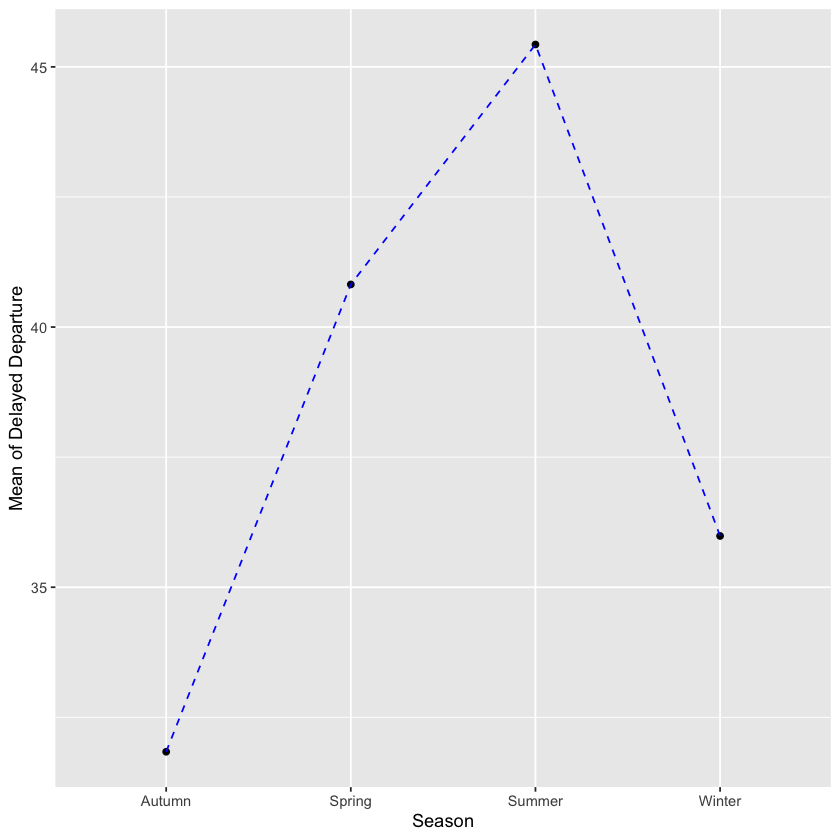

In [376]:
line <- ggplot(delayed_flights, aes(season, dep_delay))
line + stat_summary(fun.y = mean, geom = 'point')+
stat_summary(fun.y = mean, geom = "line", aes(group = 1), colour = 'Blue', linetype = 'dashed')+
stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2)+
labs(x = 'Season', y = "Mean of Delayed Departure")

However, because ANOVA only tests for an overall effect it could be that 1 of the season's does not have a statistically significant effect when compared to the other's. To test this we will use a TukeyHSD which will provide us with a pair wise comparisons of each season.

In [349]:
flight_data %>%
   aov(dep_delay ~ season, data = .)%>%
   TukeyHSD()


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dep_delay ~ season, data = .)

$season
                   diff        lwr       upr p adj
Spring-Autumn  8.980924   7.814385 10.147462     0
Summer-Autumn 13.591916  12.459569 14.724263     0
Winter-Autumn  4.146994   2.975194  5.318794     0
Summer-Spring  4.610992   3.567802  5.654183     0
Winter-Spring -4.833930  -5.919817 -3.748042     0
Winter-Summer -9.444922 -10.493993 -8.395851     0


TukeyHSD as revealed that each season has a statisically significant effect on the other meaning that each season is genuinely different to the other. The pairwise comparisons are plotted below.

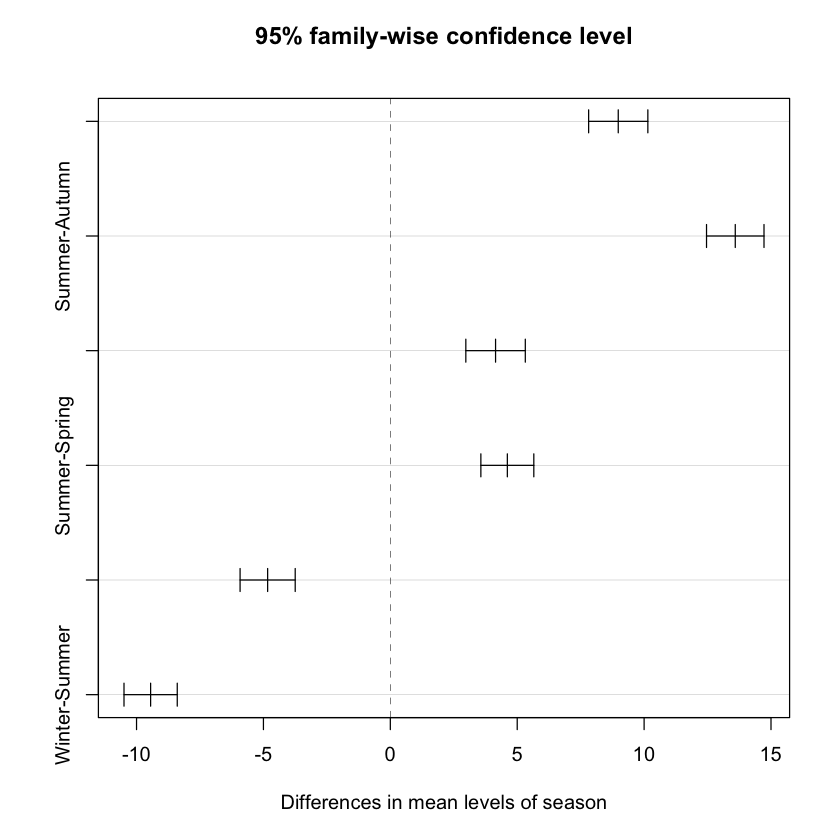

In [418]:
flight_data %>%
   aov(dep_delay ~ season, data = .)%>%
   TukeyHSD()%>%
   plot()

To improve our model we may want to control for a covariate. This is where ANCOVA comes in. We do this to reduce within-group error variance. In other words, we reduce the amount of unexplained variance in the analysis by including the covariate. It also helps to eliminate confounds which are variables that we know will affect the dependent variable.

For ANCOVA the covariate must be continuous so in this example we will use the number of engines that each plane had (it is highly unlikely that the number of engines affects the departure delay - every plane that has it's number of engines recorded has 2 - but we will use it to demonstrate how to carry out the procedure in R).

In [403]:
#Run an ANOVA to check for independence between the covariate and independent variable
ind_cov_data <- delayed_flights %>%
    select(engines, season)%>%
    drop_na()
ind_cov_data

engines,season
<int>,<fct>
2,Winter
2,Autumn
2,Autumn
2,Autumn
2,Autumn
2,Autumn
2,Autumn
2,Autumn
2,Autumn


In [404]:
ind_cov_data %>%
    aov(engines ~ season, data = .)%>%
    summary()

              Df    Sum Sq   Mean Sq F value Pr(>F)
season         3 3.600e-27 1.200e-27   0.951  0.415
Residuals   1818 2.295e-24 1.262e-27               

We have to check whether the covariate has a statistically significant effect on the indepenent variable. In this case engine does not have a statistically significant effect on season so we can conclude that these are independent and continue with our analysis. 

In [381]:
# lets explore the engines data

summary(ind_cov_data$engines)

#every value in this sample is 2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

In [342]:
ancova_data <- delayed_flights %>%
    select(season, dep_delay, engines)%>%
    drop_na()
ancova_data

season,dep_delay,engines
<fct>,<dbl>,<int>
Winter,36,2
Autumn,14,2
Autumn,3,2
Autumn,2,2
Autumn,12,2
Autumn,3,2
Autumn,24,2
Autumn,32,2
Autumn,3,2


In [420]:
flight_ancova <- aov(dep_delay ~ season + engines, data =ancova_data)
summary(flight_ancova)

              Df  Sum Sq Mean Sq F value  Pr(>F)   
season         3   29936    9979   4.812 0.00243 **
Residuals   1818 3769669    2074                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [426]:
summary.lm(flight_ancova)


Call:
aov(formula = dep_delay ~ season + engines, data = ancova_data)

Residuals:
   Min     1Q Median     3Q    Max 
-36.40 -26.83 -16.91  10.00 373.60 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    27.831      2.096  13.278  < 2e-16 ***
seasonSpring    1.448      3.723   0.389 0.697370    
seasonSummer    9.566      2.747   3.483 0.000508 ***
seasonWinter    7.083      2.963   2.391 0.016915 *  
engines            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.54 on 1818 degrees of freedom
Multiple R-squared:  0.007879,	Adjusted R-squared:  0.006241 
F-statistic: 4.812 on 3 and 1818 DF,  p-value: 0.002426


When we control for number of engines, the effect of spring on departure delay s no longer statistically significant where as the others remain statistically significant. Overall, the model acoounts for slightly less variance than the original as r2 (which is interprete as eta squared in ANOVA models) is slightly lower meaning that the model acounts for slightly less variance than the original ANOVA. 

Now let's do some postHoc analysis

In [425]:
library(multcomp)
postHocs<- glht(flight_ancova, linfct=mcp(season = "Tukey"))
summary(postHocs)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser


Warning message in glht.matrix(model = structure(list(coefficients = c(`(Intercept)` = 27.8305084745764, :
“1 out of 5 coefficients not estimable in ‘model’”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = dep_delay ~ season + engines, data = ancova_data)

Linear Hypotheses:
                     Estimate Std. Error t value Pr(>|t|)   
Spring - Autumn == 0    1.448      3.723   0.389  0.97966   
Summer - Autumn == 0    9.566      2.747   3.483  0.00289 **
Winter - Autumn == 0    7.083      2.963   2.391  0.07746 . 
Summer - Spring == 0    8.118      3.552   2.285  0.09960 . 
Winter - Spring == 0    5.635      3.722   1.514  0.42450   
Winter - Summer == 0   -2.483      2.745  -0.905  0.79953   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


ERROR: Error in confint(psotHocs): object 'psotHocs' not found


The results show that when accounting for number of engines in this ANCOVA the relationship between Spring and Autumn, Winter and Spring, and Winter and Summer are not statistically significant. 

The sample size for this ANCOVA differs greatly from the original ANOVA. Again, had this been data that I had collected myself, then I would have colleceted that data. But this serves as a demonstration fo hwo to run ANOVA and ANCOVA using R